In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration 4').getOrCreate()

In [2]:
df = spark.read.load('./new.csv', inferSchema=True, format = 'csv', header = 'true')

In [3]:
df.printSchema()
df.count()

root
 |-- url: string (nullable = true)
 |-- id: string (nullable = true)
 |-- Lng: double (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Cid: long (nullable = true)
 |-- tradeTime: timestamp (nullable = true)
 |-- DOM: string (nullable = true)
 |-- followers: integer (nullable = true)
 |-- totalPrice: double (nullable = true)
 |-- price: integer (nullable = true)
 |-- square: double (nullable = true)
 |-- livingRoom: string (nullable = true)
 |-- drawingRoom: string (nullable = true)
 |-- kitchen: integer (nullable = true)
 |-- bathRoom: string (nullable = true)
 |-- floor: string (nullable = true)
 |-- buildingType: string (nullable = true)
 |-- constructionTime: string (nullable = true)
 |-- renovationCondition: integer (nullable = true)
 |-- buildingStructure: integer (nullable = true)
 |-- ladderRatio: double (nullable = true)
 |-- elevator: double (nullable = true)
 |-- fiveYearsProperty: double (nullable = true)
 |-- subway: double (nullable = true)
 |-- district: int

318851

In [4]:
df=df.withColumn("livingRoom",df.livingRoom.astype("double")).withColumn(
    "drawingRoom",df.drawingRoom.astype("double")).withColumn(
    "bathRoom",df.bathRoom.astype("double")).withColumn(
    "buildingType",df.buildingType.astype("double")).withColumn(
    "communityAverage",df.communityAverage.astype("double"))
df.printSchema()

root
 |-- url: string (nullable = true)
 |-- id: string (nullable = true)
 |-- Lng: double (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Cid: long (nullable = true)
 |-- tradeTime: timestamp (nullable = true)
 |-- DOM: string (nullable = true)
 |-- followers: integer (nullable = true)
 |-- totalPrice: double (nullable = true)
 |-- price: integer (nullable = true)
 |-- square: double (nullable = true)
 |-- livingRoom: double (nullable = true)
 |-- drawingRoom: double (nullable = true)
 |-- kitchen: integer (nullable = true)
 |-- bathRoom: double (nullable = true)
 |-- floor: string (nullable = true)
 |-- buildingType: double (nullable = true)
 |-- constructionTime: string (nullable = true)
 |-- renovationCondition: integer (nullable = true)
 |-- buildingStructure: integer (nullable = true)
 |-- ladderRatio: double (nullable = true)
 |-- elevator: double (nullable = true)
 |-- fiveYearsProperty: double (nullable = true)
 |-- subway: double (nullable = true)
 |-- district: int

In [5]:
df.select('url','id','Lng','Lat','Cid','DOM').describe().show()

+-------+--------------------+--------------------+-------------------+------------------+--------------------+------------------+
|summary|                 url|                  id|                Lng|               Lat|                 Cid|               DOM|
+-------+--------------------+--------------------+-------------------+------------------+--------------------+------------------+
|  count|              318851|              318851|             318851|            318851|              318851|            318851|
|   mean|                null|1.010997721356747...| 116.41845944857548| 39.94959061016476|1.129113334722684...|28.822339221999826|
| stddev|                null|   3180813.157471676|0.11205430191086949|0.0919825472611379| 2.36344681604329E12|50.237342565932906|
|    min|https://bj.lianji...|        101084782030|         116.072514|          39.62703|       1111027373683|                 1|
|    max|https://bj.lianji...|        BJYZ92363553|         116.732378|         40.

In [6]:
df.select('followers','totalPrice','price','square','livingRoom','drawingRoom').describe().show()

+-------+------------------+------------------+------------------+-----------------+------------------+------------------+
|summary|         followers|        totalPrice|             price|           square|        livingRoom|       drawingRoom|
+-------+------------------+------------------+------------------+-----------------+------------------+------------------+
|  count|            318851|            318851|            318851|           318851|            318819|            318819|
|   mean|16.731507820267147|349.03020062658396| 43530.43637937469|83.24059670504248| 2.010369520009786|1.1719502288132138|
| stddev|34.209184723382876|230.78077822518074|21709.024203593606|37.23466088010018|0.7768224538956251|0.5222874790385763|
|    min|                 0|               0.1|                 1|              6.9|               0.0|               0.0|
|    max|              1143|           18130.0|            156250|           1745.5|               9.0|               5.0|
+-------+-------

In [7]:
df.select('kitchen','bathRoom','floor','buildingType','constructionTime','renovationCondition','buildingStructure').describe().show()

+-------+-------------------+------------------+------+-----------------+------------------+-------------------+-----------------+
|summary|            kitchen|          bathRoom| floor|     buildingType|  constructionTime|renovationCondition|buildingStructure|
+-------+-------------------+------------------+------+-----------------+------------------+-------------------+-----------------+
|  count|             318851|            318849|318851|           316830|            318851|             318851|           318851|
|   mean| 0.9945993583209712| 1.376444649348124|  null|3.009789802102073|1999.0025169577525| 2.6063302294802275|4.451025714205068|
| stddev|0.10960891166970901|19.418925028268855|  null|1.269857310795237| 22.44379264740517|  1.311738516830623|1.901753432753741|
|    min|                  0|               0.0| δ֪ 10|            0.048|                 0|                  0|                0|
|    max|                  4|            2011.0|  ��Ͻṹ|              4.0|          

In [8]:
df.select('ladderRatio','elevator','fiveYearsProperty','subway','district','communityAverage').describe().show()

+-------+-----------------+-------------------+------------------+------------------+-----------------+------------------+
|summary|      ladderRatio|           elevator| fiveYearsProperty|            subway|         district|  communityAverage|
+-------+-----------------+-------------------+------------------+------------------+-----------------+------------------+
|  count|           318851|             318819|            318819|            318819|           318851|            318388|
|   mean|63.16486041443505| 0.5770546924744134|0.6456014227508399|0.6011122298231912|6.763563545355041|63682.446304508965|
| stddev|25068.50608342927|0.49402767117932606|0.4783314158033766|0.4896703677568926|2.812616086044173|22329.215447185692|
|    min|              0.0|                0.0|               0.0|               0.0|                1|           10847.0|
|    max|        1.00094E7|                1.0|               1.0|               1.0|               13|          183109.0|
+-------+-------

In [9]:
df=df.drop('url','id','Cid','DOM')
df.show(1)

+----------+--------+--------------------+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+
|       Lng|     Lat|           tradeTime|followers|totalPrice|price|square|livingRoom|drawingRoom|kitchen|bathRoom|floor|buildingType|constructionTime|renovationCondition|buildingStructure|ladderRatio|elevator|fiveYearsProperty|subway|district|communityAverage|
+----------+--------+--------------------+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+
|116.475489|40.01952|2016-08-09 00:00:...|      106|     415.0|31680| 131.0|       2.0|        1.0|      1|     1.0|�� 26|         1.0|            2005|                  3|                6|      0.217|     1.0|

In [10]:
from pyspark.sql.functions import dayofmonth,month,hour,year,format_number
new_df = df.withColumn("tradeYear",year(df["tradeTime"])).withColumn(
    'UsedTime',year(df["tradeTime"])-year(df["constructionTime"])).withColumn(
    'newtotal',df['price']*df['square'])
new_df.head(1)

[Row(Lng=116.475489, Lat=40.01952, tradeTime=datetime.datetime(2016, 8, 9, 0, 0), followers=106, totalPrice=415.0, price=31680, square=131.0, livingRoom=2.0, drawingRoom=1.0, kitchen=1, bathRoom=1.0, floor='�� 26', buildingType=1.0, constructionTime='2005', renovationCondition=3, buildingStructure=6, ladderRatio=0.217, elevator=1.0, fiveYearsProperty=0.0, subway=1.0, district=7, communityAverage=56021.0, tradeYear=2016, UsedTime=11, newtotal=4150080.0)]

In [11]:
from pyspark.sql.functions import mean
median_bt=new_df.approxQuantile('buildingType',[0.5],0.05)[0]
median_lr=new_df.approxQuantile('livingRoom',[0.5],0.05)[0]
median_dr=new_df.approxQuantile('drawingRoom',[0.5],0.05)[0]
median_br=new_df.approxQuantile('bathRoom',[0.5],0.05)[0]
mean_ca=new_df.select(mean(new_df['communityAverage'])).collect()[0][0]

In [12]:
new_df=new_df.na.fill(1.0, subset=['elevator']).na.fill(1.0, subset=['fiveYearsProperty']).na.fill(
    1.0, subset=['subway']).na.fill(median_lr,subset=['livingRoom']).na.fill(median_dr,subset=['drawingRoom']).na.fill(
    median_br,subset=['bathRoom']).na.fill(mean_ca,subset=['communityAverage'])
new_df.select('elevator','fiveYearsProperty','subway','livingRoom','drawingRoom','bathRoom','communityAverage').describe().show()

+-------+------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+
|summary|          elevator|  fiveYearsProperty|            subway|        livingRoom|       drawingRoom|          bathRoom| communityAverage|
+-------+------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+
|  count|            318851|             318851|            318851|            318851|            318851|            318851|           318851|
|   mean|0.5770971394162163| 0.6456369903183619|0.6011522623419716| 2.010368479321062|1.1719329718269662|1.3764422880906755|63682.44630450872|
| stddev|0.4940210486605661|0.47832058767946184|0.4896620996168723|0.7767834786516646|0.5222641103964839| 19.41886414804933|22312.99750368578|
|    min|               0.0|                0.0|               0.0|               0.0|               0.0|               0.0|          10847.0|

In [13]:
#ountlier
quantiles_lng = new_df.approxQuantile('Lng',[0.25,0.75],0.05)
IQR = quantiles_lng[1] - quantiles_lng[0]
min_value_lng = quantiles_lng[0] - 1.5 * IQR
max_value_lng = quantiles_lng[1] + 1.5 * IQR

quantiles_lat = new_df.approxQuantile('Lat',[0.25,0.75],0.05)
IQR = quantiles_lat[1] - quantiles_lat[0]
min_value_lat = quantiles_lat[0] - 1.5 * IQR
max_value_lat = quantiles_lat[1] + 1.5 * IQR

quantiles_sq = new_df.approxQuantile('square',[0.25,0.75],0.05)
IQR = quantiles_sq[1] - quantiles_sq[0]
min_value_sq = quantiles_sq[0] - 1.5 * IQR
max_value_sq = quantiles_sq[1] + 1.5 * IQR

quantiles_f = new_df.approxQuantile('followers',[0.25,0.75],0.05)
IQR = quantiles_f[1] - quantiles_f[0]
min_value_f = quantiles_f[0] - 1.5 * IQR
max_value_f = quantiles_f[1] + 1.5 * IQR

model_data = new_df.filter((new_df['Lng'] >= min_value_lng) & 
              (new_df['Lng'] <= max_value_lng)&
              (new_df['Lat'] >= min_value_lat) & 
              (new_df['Lat'] <= max_value_lat) &
             (new_df['square'] >= min_value_sq) & 
              (new_df['square'] <= max_value_sq)&
             (new_df['followers'] >= min_value_f) & 
              (new_df['followers'] <= max_value_f))
model_data.count()

254488

In [14]:
new_df.filter(new_df['buildingType'] < 1).select('buildingType').show()
model_data=model_data.filter(new_df['buildingType'] >= 1)
model_data.count()

+------------+
|buildingType|
+------------+
|         0.5|
|       0.333|
|       0.333|
|         0.5|
|       0.125|
|         0.5|
|         0.5|
|       0.333|
|         0.5|
|       0.125|
|       0.333|
|         0.5|
|        0.25|
|         0.5|
|        0.25|
|         0.5|
|         0.5|
|         0.5|
|         0.5|
|       0.125|
+------------+
only showing top 20 rows



253910

In [15]:
model_data=model_data.drop('floor','constructionTime','totalPrice','tradeTime')
model_data.show(1)

+----------+--------+---------+-----+------+----------+-----------+-------+--------+------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+---------+--------+----------+
|       Lng|     Lat|followers|price|square|livingRoom|drawingRoom|kitchen|bathRoom|buildingType|renovationCondition|buildingStructure|ladderRatio|elevator|fiveYearsProperty|subway|district|communityAverage|tradeYear|UsedTime|  newtotal|
+----------+--------+---------+-----+------+----------+-----------+-------+--------+------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+---------+--------+----------+
|116.284755|39.93453|        6|32981| 64.28|       1.0|        0.0|      1|     1.0|         1.0|                  3|                6|      0.111|     1.0|              0.0|   1.0|       8|         70141.0|     2016|       7|2120018.68|
+----------+--------+---------+-----+------+----

In [16]:
#from pyspark.sql.functions import log
#model_data=model_data.withColumn('logsquare',log(df['square'])+1)
#model_data.show(1)

In [17]:
model_data=model_data.orderBy('price')
model_data.show(5)

+----------+---------+---------+-----+------+----------+-----------+-------+--------+------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+---------+--------+--------+
|       Lng|      Lat|followers|price|square|livingRoom|drawingRoom|kitchen|bathRoom|buildingType|renovationCondition|buildingStructure|ladderRatio|elevator|fiveYearsProperty|subway|district|communityAverage|tradeYear|UsedTime|newtotal|
+----------+---------+---------+-----+------+----------+-----------+-------+--------+------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+---------+--------+--------+
|116.441833|39.866749|        0|    1| 63.48|       2.0|        1.0|      1|     0.0|         1.0|                  1|                6|       0.25|     1.0|              1.0|   1.0|       2|         60626.0|     2011|      16|   63.48|
|  116.4515|39.904606|        0|    1|  69.0|       

In [18]:
model_data.printSchema()

root
 |-- Lng: double (nullable = true)
 |-- Lat: double (nullable = true)
 |-- followers: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- square: double (nullable = true)
 |-- livingRoom: double (nullable = false)
 |-- drawingRoom: double (nullable = false)
 |-- kitchen: integer (nullable = true)
 |-- bathRoom: double (nullable = false)
 |-- buildingType: double (nullable = true)
 |-- renovationCondition: integer (nullable = true)
 |-- buildingStructure: integer (nullable = true)
 |-- ladderRatio: double (nullable = true)
 |-- elevator: double (nullable = false)
 |-- fiveYearsProperty: double (nullable = false)
 |-- subway: double (nullable = false)
 |-- district: integer (nullable = true)
 |-- communityAverage: double (nullable = false)
 |-- tradeYear: integer (nullable = true)
 |-- UsedTime: integer (nullable = true)
 |-- newtotal: double (nullable = true)



In [19]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [20]:
assembler = VectorAssembler(
    inputCols=['Lng','Lat','followers','square','livingRoom','drawingRoom','kitchen',
              'bathRoom','buildingType','renovationCondition','buildingStructure','ladderRatio',
               'elevator','fiveYearsProperty','subway','district','communityAverage','tradeYear','newtotal'],
    outputCol="features")
output = assembler.transform(model_data)
output.printSchema()
final_data = output.select("features",'price')
final_data.head(1)

root
 |-- Lng: double (nullable = true)
 |-- Lat: double (nullable = true)
 |-- followers: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- square: double (nullable = true)
 |-- livingRoom: double (nullable = false)
 |-- drawingRoom: double (nullable = false)
 |-- kitchen: integer (nullable = true)
 |-- bathRoom: double (nullable = false)
 |-- buildingType: double (nullable = true)
 |-- renovationCondition: integer (nullable = true)
 |-- buildingStructure: integer (nullable = true)
 |-- ladderRatio: double (nullable = true)
 |-- elevator: double (nullable = false)
 |-- fiveYearsProperty: double (nullable = false)
 |-- subway: double (nullable = false)
 |-- district: integer (nullable = true)
 |-- communityAverage: double (nullable = false)
 |-- tradeYear: integer (nullable = true)
 |-- UsedTime: integer (nullable = true)
 |-- newtotal: double (nullable = true)
 |-- features: vector (nullable = true)



[Row(features=DenseVector([116.4515, 39.9046, 0.0, 69.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 0.25, 1.0, 1.0, 1.0, 1.0, 84031.0, 2011.0, 69.0]), price=1)]

In [21]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [32]:
train_data,test_data = final_data.randomSplit([0.7,0.3])
train_data.describe().show()
test_data.describe().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|            177836|
|   mean| 42611.93939922175|
| stddev|20774.942773560542|
|    min|                 1|
|    max|            150000|
+-------+------------------+

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|             76140|
|   mean| 42636.70207512477|
| stddev|20794.845435130832|
|    min|                 1|
|    max|            150000|
+-------+------------------+



In [ ]:
lr = LinearRegression(labelCol='price')
lrModel = lr.fit(train_data)

In [23]:
import pandas
lr_predictions = lrModel.transform(test_data)
lr_predictions.select("prediction","price").show(10)
columns =['Lng','Lat','followers','square','livingRoom','drawingRoom','kitchen',
              'bathRoom','buildingType','renovationCondition','buildingStructure','ladderRatio',
               'elevator','fiveYearsProperty','subway','district','communityAverage','tradeYear','newtotal']
df = pandas.DataFrame({'attributes': columns, 'coefficient': lrModel.coefficients,})
print(df)
print("Intercept: {}".format(lrModel.intercept))

test_results = lrModel.evaluate(test_data)
print('Model: linear regression')
print("RSME: {}".format(test_results.rootMeanSquaredError))
print("R2: {}".format(test_results.r2))
test_results.residuals.show()

+------------------+-----+
|        prediction|price|
+------------------+-----+
| 782.0828419839963|    3|
|24008.549050875008| 6908|
|17428.768690615892| 4783|
| 8775.320215279236|    3|
| 8574.428826021962| 5596|
| 20868.02475721948| 6801|
|20791.918033164926| 6800|
|19477.405879523605| 6800|
| 18301.50638456829| 6800|
|15063.626786114648| 6800|
+------------------+-----+
only showing top 10 rows

             attributes  coefficient
0                   Lng -1525.035591
1                   Lat  5020.175128
2             followers    19.498049
3                square  -406.294041
4            livingRoom   -81.444325
5           drawingRoom   929.265793
6               kitchen -2485.062624
7              bathRoom  1689.589134
8          buildingType  -149.178509
9   renovationCondition  -739.249674
10    buildingStructure  -354.540990
11          ladderRatio    -0.000144
12             elevator  -393.838409
13    fiveYearsProperty  -708.270867
14               subway   276.425185
15  

In [24]:
import matplotlib.pyplot as plt
lrp = lr_predictions.toPandas()

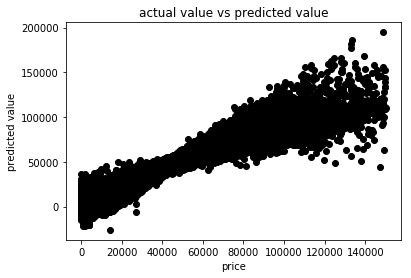

In [25]:
plt.plot(lrp['price'],lrp['prediction'],'o', color='black') 
plt.title('actual value vs predicted value')
plt.xlabel('price')
plt.ylabel('predicted value')
plt.show()

In [26]:
rf = RandomForestRegressor(featuresCol="features", labelCol = 'price')
rf_model = rf.fit(train_data)

In [27]:
rf_predictions = rf_model.transform(test_data)
rf_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction")

rf_predictions.select("prediction","price").show(10)
df = pandas.DataFrame({'attributes': columns, 'feature Importances': rf_model.featureImportances,})
print('# of trees:', rf_model.getNumTrees)
print(df)
print('Model: Random forest Regressor')
print('RMSE:', rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "rmse"}))
print('R2:', rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "r2"}))

+------------------+-----+
|        prediction|price|
+------------------+-----+
|19032.664374223594|    3|
| 28824.52498560265| 6908|
| 21779.07392334953| 4783|
| 34722.83795573782| 7705|
|21423.472427283185|    3|
|26376.906195987063|    3|
| 19688.33055382646| 6800|
| 19688.33055382646| 6800|
| 19688.33055382646| 6800|
| 19688.33055382646| 6800|
+------------------+-----+
only showing top 10 rows

# of trees: 20
             attributes  feature Importances
0                   Lng             0.004499
1                   Lat             0.023904
2             followers             0.009702
3                square             0.054178
4            livingRoom             0.004648
5           drawingRoom             0.004851
6               kitchen             0.000000
7              bathRoom             0.006193
8          buildingType             0.000000
9   renovationCondition             0.023889
10    buildingStructure             0.002258
11          ladderRatio             0.000

Text(0,0.5,'predicted value')

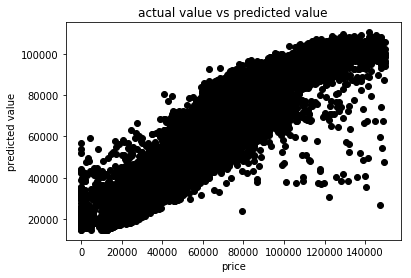

In [28]:
rfp = rf_predictions.toPandas()
plt.plot(rfp['price'],rfp['prediction'],'o', color='black') 
plt.title('actual value vs predicted value')
plt.xlabel('price')
plt.ylabel('predicted value')

In [29]:
subset1,subset2=final_data.randomSplit([0.1,0.9])
train_data,test_data = subset1.randomSplit([0.7,0.3])
train_data.describe().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|             17768|
|   mean|42828.930943268795|
| stddev|20711.734229686397|
|    min|                 2|
|    max|            149933|
+-------+------------------+



In [30]:
lr = LinearRegression(labelCol='price')
lrModel = lr.fit(train_data)
lr_predictions = lrModel.transform(test_data)
lr_predictions.select("prediction","price").show(10)
df = pandas.DataFrame({'attributes': columns, 'coefficient': lrModel.coefficients,})
print(df)
print("Intercept: {}".format(lrModel.intercept))

test_results = lrModel.evaluate(test_data)
print('Model: linear regression')
print("RSME: {}".format(test_results.rootMeanSquaredError))
print("R2: {}".format(test_results.r2))
test_results.residuals.show()

+-------------------+-----+
|         prediction|price|
+-------------------+-----+
|   6488.45946892444| 1997|
|  17597.15946311783| 4783|
| 3060.7742544310167| 3918|
|   4838.38012458384|    4|
|  28059.17839507293|    3|
|  4100.014441032894|    3|
| -6737.455491489731| 3646|
|-10595.295297628269| 1779|
| -15429.10619230941| 1632|
|-12713.267375029624| 3103|
+-------------------+-----+
only showing top 10 rows

             attributes  coefficient
0                   Lng  -882.109653
1                   Lat  5081.837206
2             followers    18.152932
3                square  -407.170802
4            livingRoom  -103.436522
5           drawingRoom   888.615442
6               kitchen -1704.966437
7              bathRoom  2036.292100
8          buildingType   -62.037940
9   renovationCondition  -725.472942
10    buildingStructure  -404.916248
11          ladderRatio -1474.764761
12             elevator  -275.825012
13    fiveYearsProperty  -863.281004
14               subway   2

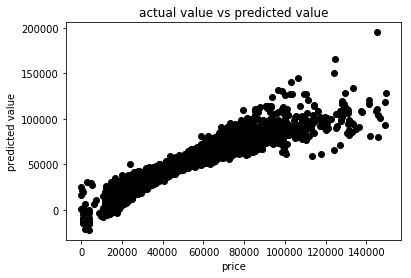

In [31]:
import matplotlib.pyplot as plt
lrp = lr_predictions.toPandas()
plt.plot(lrp['price'],lrp['prediction'],'o', color='black') 
plt.title('actual value vs predicted value')
plt.xlabel('price')
plt.ylabel('predicted value')
plt.show()